# Setup

# Datasets

In [1]:
%matplotlib notebook
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import seaborn as sn
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'Naive Bayesian'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
path = '../processeddata/individual_stocks_5yr/individual_stocks_5yr/'
ticker = 'T' # Change Stock to analyze

p = path + ticker + '_data.csv' 
df = pd.read_csv(p)
df.set_index(['date'],inplace=True)

df

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,35.39,35.525,35.160,35.27,18275496,T
2013-02-11,35.26,35.315,35.060,35.23,13687717,T
2013-02-12,35.25,35.670,35.230,35.60,16958584,T
2013-02-13,35.67,35.810,35.340,35.42,17410587,T
2013-02-14,35.42,35.440,35.030,35.29,26205412,T
...,...,...,...,...,...,...
2018-02-01,38.51,39.290,38.401,39.16,59963826,T
2018-02-02,39.03,39.040,37.810,38.07,46098657,T
2018-02-05,37.81,38.310,36.630,36.63,45595537,T


In [3]:
df['Movement'] = 'Up'

prevPrice = 0.0
for index, row in df.iterrows():
    if row['close'] < prevPrice:
        df.loc[index, 'Movement'] = 'Down'
    prevPrice = row['close']

df['Follow'] = 'Yes'

prevMove = 'Yes'
for index, row in df.iterrows():
    if row['Movement'] != prevMove:
        df.loc[index, 'Follow'] = 'No'
    prevMove = row['Movement']
    
df['%Change'] = 0

prevClose = df['close'][0]
for index, row in df.iterrows():
    diff = row['close'] - prevClose
    perc = (diff / prevClose) * 100
    df.loc[index, '%Change'] = perc
    prevClose = row['close']
    

df.tail()

,open,high,low,close,volume,Name,Movement,Follow,%Change
date,,,,,,,,,
2018-02-01,38.51,39.29,38.401,39.16,59963826,T,Up,Yes,4.566088
2018-02-02,39.03,39.04,37.810,38.07,46098657,T,Down,No,-2.783453
2018-02-05,37.81,38.31,36.630,36.63,45595537,T,Down,Yes,-3.782506
2018-02-06,36.08,37.07,35.500,36.83,62905300,T,Up,No,0.546001
2018-02-07,36.81,37.45,36.740,36.93,35634519,T,Up,Yes,0.271518


In [4]:
X, y = df[['%Change',"Follow"]], df[['Movement']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [6]:
for index, row in X_train.iterrows():
    if row['Follow'] == "Yes":
        X_train.loc[index, 'Follow'] = 1
    else:
        X_train.loc[index, 'Follow'] = 0
        
        
for index, row in y_train.iterrows():
    if row['Movement'] == "Up":
        y_train.loc[index, 'Movement'] = 1
    else:
        y_train.loc[index, 'Movement'] = 0
        

C:\Users\Ray\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Ray\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Ray\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [7]:
print(X_train)
print(y_train)

             %Change Follow
date                       
2013-10-02 -0.352319      0
2016-08-22 -0.243843      1
2015-02-18 -0.633823      0
2017-02-16  0.316148      1
2015-12-23  1.075269      1
...              ...    ...
2013-05-16 -0.399680      0
2015-01-06  0.149031      0
2017-08-28 -0.131614      0
2016-03-17  0.902760      1
2015-06-16  0.755594      0

[881 rows x 2 columns]
           Movement
date               
2013-10-02        0
2016-08-22        0
2015-02-18        0
2017-02-16        1
2015-12-23        1
...             ...
2013-05-16        0
2015-01-06        1
2017-08-28        0
2016-03-17        1
2015-06-16        1

[881 rows x 1 columns]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
arr = []
for index, row in y_train.iterrows():
    arr.append(row['Movement'])

for i in range(0, len(X_test)):
    if X_test['Follow'][i] == 'Yes':
        X_test['Follow'][i] = 1
    else:
        X_test['Follow'][i] = 0

gnb.fit(X_train.to_numpy(), arr)        
y_pred = gnb.predict(X_test)

C:\Users\Ray\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Ray\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back 

In [9]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[179   3]
 [  0 196]]


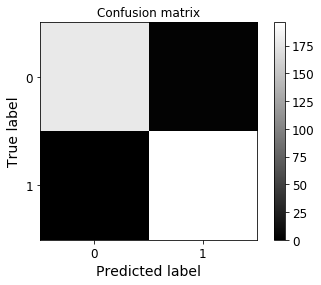

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       182
           1       0.98      1.00      0.99       196

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378



In [10]:
test = []

for index, row in y_test.iterrows():
    if row['Movement'] == 'Up':
        test.append(1)
    else:
        test.append(0)


cm = confusion_matrix(test, y_pred)
print(cm)
plot_confusion_matrix(cm, 2)

# Print classification report
result_metrics = classification_report(test, y_pred)
print(result_metrics)
